# KMeans



In [26]:
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
import numpy as np


In [87]:
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

In [88]:
print(f"feature_names: {feature_names}")
print(f"target_names: {target_names}")
print(f"X: {len(X)}, y: {len(y)}")
# Prit number of possible clusters and values of y
print(f"Number of possible clusters: {len(set(y))}")

feature_names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
target_names: ['setosa' 'versicolor' 'virginica']
X: 150, y: 150
Number of possible clusters: 3


In [89]:
from sklearn.cluster import KMeans

In [90]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=42)

In [91]:
y_pred = kmeans.predict(X)

In [92]:
from scipy import stats
mapping = {}
for class_id in np.unique(y):
    mode, _ = stats.mode(y_pred[y==class_id])
    print(f"mode: {mode}, class_id: {class_id}")
    mapping[int(mode)] = int(class_id)
mapping

mode: 1, class_id: 0
mode: 2, class_id: 1
mode: 0, class_id: 2


{1: 0, 2: 1, 0: 2}

In [1]:
class KMeansExample:
    def __init__(self, n_clusters=3, iterations=10,
                 tol=1e-4, labels=None,
                 centroids=None,
                 random_state=42):
        self.n_clusters = n_clusters
        self.iterations = iterations
        self.tol = tol
        self.random_state = random_state
        self.centroids = centroids
        self.labels = labels
        self.inertia = None

    def fit(self, X):
        if self.centroids is None:
            self.centroids = X[np.random.choice(len(X), self.n_clusters, replace=False)]
        for i in range(self.iterations):
            # X[:, np.newaxis]: reshapes X from shape (n, 2) to (n, 1, 2) to allow broadcasting.
            # Disances will be: n_samples x n_clusters
            # [ pt-0: [dist-0, dist-1, dist-2],
            #   pt-1: [dist-0, dist-1, dist-2],
            #   pt-2: [dist-0, dist-1, dist-2],
            # ]
            distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2 )
            self.labels = np.argmin(distances, axis=1)
            new_centroids = np.array([X[self.labels == j].mean(axis=0) for j in range(self.n_clusters)])
            if np.linalg.norm(new_centroids - self.centroids) < self.tol:
                self.centroids = new_centroids
                break
            self.centroids = new_centroids
        return self

    def predict(self, X):
        return self.labels

In [2]:
kmean_ex = KMeansExample(n_clusters=3, random_state=42)
kmean_ex.fit(X)

NameError: name 'X' is not defined

In [95]:
y_pred_ex = kmean_ex.predict(X)

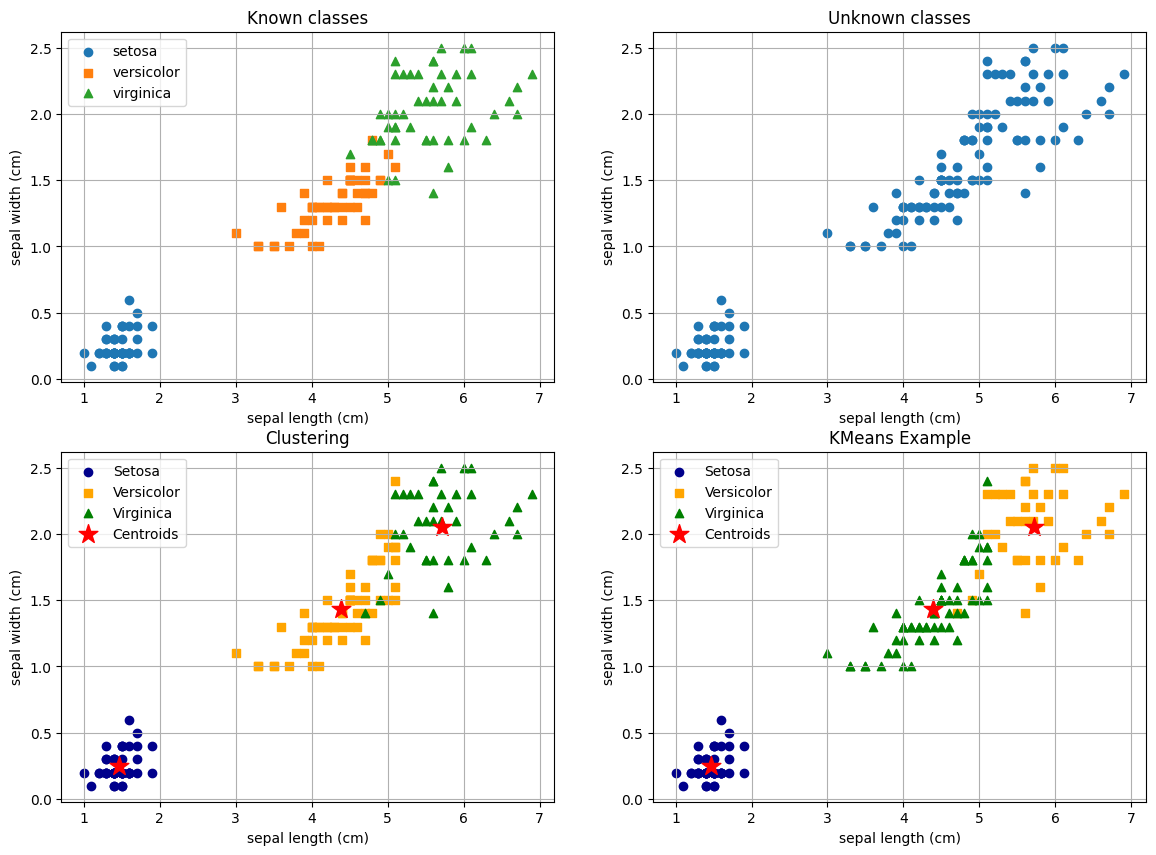

In [97]:
from matplotlib import pyplot as plt

# CReate two figures
fig, ax = plt.subplots(2, 2, figsize=(14, 10))

# Plot the first 2 features
ax[0,0].scatter(X[y == 0, 2], X[y == 0, 3], label=target_names[0], marker="o")
ax[0,0].scatter(X[y == 1, 2], X[y == 1, 3], label=target_names[1], marker="s")
ax[0,0].scatter(X[y == 2, 2], X[y == 2, 3], label=target_names[2], marker="^")
ax[0,0].set_xlabel(feature_names[0])
ax[0,0].set_ylabel(feature_names[1])
ax[0,0].set_title("Known classes")
# Add legend as 0 => Setosa, 1 => Versicolor, 2 => Virginica
ax[0,0].legend()
ax[0,0].grid(True)

# Plot all points
ax[0,1].scatter(X[:, 2], X[:, 3])
ax[0,1].set_xlabel(feature_names[0])
ax[0,1].set_ylabel(feature_names[1])
ax[0,1].set_title("Unknown classes")
ax[0,1].grid(True)


# Plot the clusters,
ax[1, 0].scatter(X[y_pred == 1, 2], X[y_pred == 1, 3],
                 marker="o", c="darkblue", label="Setosa")
ax[1, 0].scatter(X[y_pred == 2, 2], X[y_pred == 2, 3],
                 marker="s", c="orange", label="Versicolor")
ax[1, 0].scatter(X[y_pred == 0, 2], X[y_pred == 0, 3],
                 marker="^", c="green", label="Virginica")
# Show centroids
ax[1, 0].scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3],
                 marker="*", s=200, c="red", label="Centroids")
ax[1, 0].set_xlabel(feature_names[0])
ax[1, 0].set_ylabel(feature_names[1])
ax[1, 0].set_title("Clustering")
ax[1, 0].legend()
ax[1, 0].grid(True)

ax[1, 1].scatter(X[y_pred_ex == 1, 2], X[y_pred_ex == 1, 3],
                 marker="o", c="darkblue", label="Setosa")
ax[1, 1].scatter(X[y_pred_ex == 2, 2], X[y_pred_ex == 2, 3],
                 marker="s", c="orange", label="Versicolor")
ax[1, 1].scatter(X[y_pred_ex == 0, 2], X[y_pred_ex == 0, 3],
                 marker="^", c="green", label="Virginica")
# Show centroids
ax[1, 1].scatter(kmean_ex.centroids[:, 2], kmean_ex.centroids[:, 3],
                 marker="*", c="red", label="Centroids",
                 s=200)
ax[1, 1].set_xlabel(feature_names[0])
ax[1, 1].set_ylabel(feature_names[1])
ax[1, 1].set_title("KMeans Example")
ax[1, 1].legend()
ax[1, 1].grid(True)
plt.show()

## Understanding NumPy Math

This section looks into axis math by NumPy.